# Project 3 Collaborative Filtering

## Question 1:
Compute the sparsity of the movie rating dataset, where sparsity is defined by the following equation:
$$Sparsity = \frac{Total number of available ratings}{Total number of possible ratings}$$

In [2]:
# import data
import numpy as np
import csv
def loadCSVfile(name):
    try:
        tmp = np.loadtxt(name, dtype = np.str, delimiter = ",")
        data = tmp[1:,0:].astype(np.str) #加载数据部分
        label = tmp[0,0:].astype(np.str) #加载类别标签部分
    except ValueError:
        with open(name,"r",encoding = "UTF-8") as f:
            content = csv.reader(f)
            li = []
            i = 0
            for row in content:
                if i == 0:
                    label = np.array(row)
                else:
                    li.append(np.array(row))
                i += 1
            data = np.array(li)
    return data, label #返回array类型的数据

ratings, rate_label = loadCSVfile('ratings.csv')
tags, tag_label = loadCSVfile('tags.csv')
links, link_label = loadCSVfile('links.csv')
movies, movie_label = loadCSVfile('movies.csv')

In [3]:
print('-'*20,'ratings','-'*20)
print("The labels are:",rate_label)
print("How much is the data:",ratings.shape)
print('-'*20,'tags','-'*20)
print("The labels are:",tag_label)
print("How much is the data:",tags.shape)
print('-'*20,'links','-'*20)
print("The labels are:",link_label)
print("How much is the data:",links.shape)
print('-'*20,'movies','-'*20)
print("The labels are:",movie_label)
print("How much is the data:",movies.shape)

-------------------- ratings --------------------
The labels are: ['userId' 'movieId' 'rating' 'timestamp']
How much is the data: (100836, 4)
-------------------- tags --------------------
The labels are: ['userId' 'movieId' 'tag' 'timestamp']
How much is the data: (3683, 4)
-------------------- links --------------------
The labels are: ['movieId' 'imdbId' 'tmdbId']
How much is the data: (9742, 3)
-------------------- movies --------------------
The labels are: ['movieId' 'title' 'genres']
How much is the data: (9742, 3)


In [4]:
def sparsity(data):
    rate = 0
    total = len(data)
    for i in data:
        if i.startswith("0"):
            pass
        else:
            rate+=1
    return float(rate)/float(total)

sparsity(ratings[:,2])

0.9864135824507121

## Question 2:
Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram.

In [5]:
from collections import Counter
rating_span = np.arange(0.5,5.5,0.5)
rating_counter = Counter(ratings[:,2])
rating_counter2 = [rating_counter[str(i)] for i in rating_span]
rating_count = np.array([rating_span,rating_counter])
rating_counter

Counter({'0.5': 1370,
         '1.0': 2811,
         '1.5': 1791,
         '2.0': 7551,
         '2.5': 5550,
         '3.0': 20047,
         '3.5': 13136,
         '4.0': 26818,
         '4.5': 8551,
         '5.0': 13211})

Text(0.5,1,'Frequency of rating values')

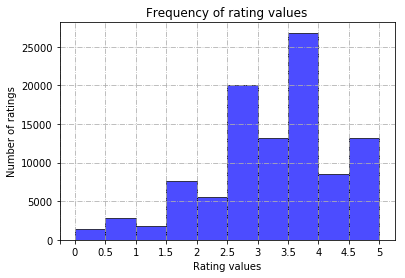

In [6]:
# plot the histogram
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(rating_span, rating_counter2, 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks((0,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25),(u'',u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating values')
plt.ylabel('Number of ratings')
plt.title('Frequency of rating values')

## Question 3:
Plot the distribution of the number of ratings received among movies. To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y-axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has index 1; ties can broken in any way. A monotonically decreasing curve instead of a histogram is expected.

In [7]:
movie_rate = Counter(ratings[:,1])
movie_rate_dec = sorted(movie_rate.items(),key = lambda item: item[1],
                 reverse = True)
movie_y = [i[1] for i in movie_rate_dec]
movie_x = [i[0] for i in movie_rate_dec]

Text(0.5,1,'Distribution of the number of ratings received among movies')

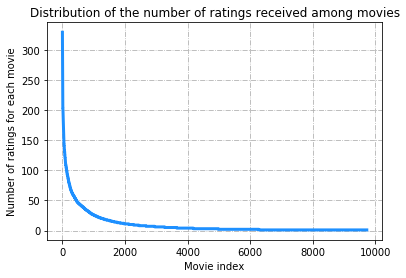

In [8]:
length = len(movie_y)
plt.plot(range(1,length+1),movie_y,color='dodgerblue',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('Movie index')
plt.ylabel('Number of ratings for each movie')
plt.title('Distribution of the number of ratings received among movies')

## Question 4:
Plot the distribution of ratings among users. To be specific, the X-axis should be the user index ordered by decreasing frequency and the Y-axis should be the number of movies the user have rated. The requirement of the plot is similar to that in Question 3.

In [9]:
user_rate = Counter(ratings[:,0])
user_rate_dec = sorted(user_rate.items(),key = lambda item: item[1],
                      reverse = True)
user_y = [i[1] for i in user_rate_dec]
user_x = [i[0] for i in user_rate_dec]

Text(0.5,1,'Distribution of ratings among users')

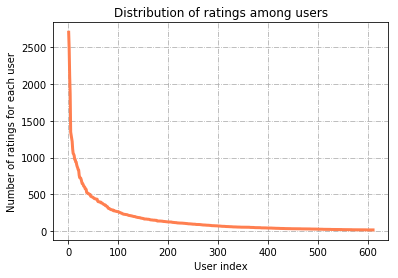

In [10]:
length = len(user_y)
plt.plot(range(1,length+1),user_y,color='coral',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('User index')
plt.ylabel('Number of ratings for each user')
plt.title('Distribution of ratings among users')

## Question 5:
Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.

#### There are so many movies but the number of ratings are nothing comparing to that of movies. And there are so many movies that only one or two ratings are received. 

## Question 6:
Compute the variance of the rating values received by each movie. Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram. 

In [11]:
# Calculate the variance of ratings for each movie
def get_var(data):
    length = data.shape[0]
    d = {}
    d_key = set(data[:,0])
    for i in d_key:
        li = []
        for j in range(length):
            if i == data[j,0]:
                li.append(float(data[j,1]))
        d_var = np.var(li)
        d[i] = d_var
    return d

rating_var_dict = get_var(ratings[:,1:3])

In [12]:
# Compute the number of movies in each variance interval
import math
def get_interval(var_dict):
    max_value = max(var_dict.values())
    interval = np.arange(0,float(float(math.ceil(max_value*2))/2+0.5),0.5)
    length = len(interval)
    counter = {}
    for i in interval[:-1]:
        counter[i] = 0
    for item in var_dict.items():
        for i in range(length-1):
            if item[1]>=interval[i] and item[1]<interval[i+1]:
                counter[interval[i]]+=1
    return counter, interval

rating_var_count,interval = get_interval(rating_var_dict)
print('The number of ratings to each interval of variance:')
rating_var_count

The number of ratings to each interval of variance:


{0.0: 5996,
 0.5: 2313,
 1.0: 990,
 1.5: 265,
 2.0: 100,
 2.5: 22,
 3.0: 27,
 3.5: 4,
 4.0: 4,
 4.5: 1,
 5.0: 2}

Text(0.5,1,'Variance of the rating values rerceived by each movie')

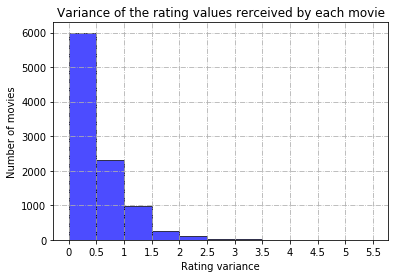

In [13]:
# show time
plt.bar(rating_var_count.keys(), rating_var_count.values(), 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks(interval-0.25,(u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5',u'5.5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating variance')
plt.ylabel('Number of movies')
plt.title('Variance of the rating values rerceived by each movie')

## Question 7:
Write down the formula for $\mu_u$ in terms of $I_u$ and $r_{uk}$

$$\mu_u = \frac{\sum_{k = I_u[0]}^{I_u[-1]} r_{uk}}{len(I_u)}$$ 

## Question 8:
In plain words, explain the meaning of $I_u \bigcap I_v$ . Can $I_u \bigcap I_v = \phi$ (Hint: Rating matrix R is sparse).

## Question 9:
Can you explain the reason behind mean-centering the raw ratings $(r_{uj}-\mu_v)$ in the prediction function? (Hint: Consider users who either rate all items highly or rate all items poorly and the impact of these users on the prediction function)

## Question 10:
Design a k-NN collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [14]:
# define rating matrix
movie_num = len(set(movies[:,0]))
user_num = len(set(ratings[:,0]))
movie_id = movies[:,0]
user_id = list(set(ratings[:,0]))
user_id.sort(key=list(ratings[:,0]).index)
R_matrix = np.zeros([user_num,movie_num])

# put ratings into the R_matrix
total = len(ratings[:,0])
i,j = 0,0
for k in range(total):
    tag = 0
    while (i < user_num):
        if (j == movie_num):
            i += 1
            j = 0
        else:
            pass
        while (j < movie_num and i < user_num):
            if (user_id[i] == ratings[k,0] and movie_id[j] == ratings[k,1]):
                R_matrix[i][j] = float(ratings[k,2])
                tag = 1
                break
            else:
                j += 1
        if (tag):
            break
        else:
            pass
R_matrix

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [15]:
# construct k-NN filter
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
import os

file_path = os.path.expanduser('ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
 
sim = {'name':'pearson','user_based':True}
knn = KNNWithMeans(k=2, min_k=1, sim_options=sim, verbose=True)
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0242  1.0302  1.0260  1.0167  1

{'fit_time': (1.6344237327575684,
  1.6988708972930908,
  1.7874996662139893,
  1.7281510829925537,
  1.759369134902954,
  1.6662938594818115,
  1.694767951965332,
  1.7256569862365723,
  1.6708691120147705,
  1.6465187072753906),
 'test_mae': array([0.79148626, 0.79596649, 0.79332647, 0.7834524 , 0.77426144,
        0.77541234, 0.79339443, 0.77798818, 0.78537931, 0.77858541]),
 'test_rmse': array([1.02417782, 1.03015117, 1.02599311, 1.01668911, 1.00397358,
        1.00413073, 1.02770551, 1.00759628, 1.01721878, 1.00304159]),
 'test_time': (0.8343803882598877,
  0.8476290702819824,
  0.8837502002716064,
  0.9181985855102539,
  0.8967292308807373,
  0.9137964248657227,
  0.8219048976898193,
  0.8765237331390381,
  0.8756062984466553,
  0.8985252380371094)}

In [16]:
# try k-NN filter on different k
mae = []
rmse = []
sim = {'name':'pearson','user_based':True}
for k in range(2,102,2):
    knn = KNNWithMeans(k=k, min_k=1, sim_options=sim, verbose=True)
    result_dict = cross_validate(knn, data, measures=['RMSE', 'MAE'], 
                                 cv=10, verbose=True)
    mae.append(np.mean(result_dict['test_mae']))
    rmse.append(np.mean(result_dict['test_rmse']))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0118  1.0079  1.0171  1.0138  1

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8948  0.8966  0.8894  0.9011  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8888  0.8909  0.8898  0.8710  0

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8860  0.8854  0.8980  0.8961  0.8893  0.8796  0.8920  0.8853  0.8871  0.90

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8779  0.8923  0.8971  0.8850  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8854  0.8979  0.8740  0.8911  0

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8875  0.8779  0.8928  0.8952  0.8927  0.8935  0.8782  0.8963  0.8824  0.88

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8877  0.8815  0.8883  0.8855  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8887  0.8918  0.8813  0.8908  0

Text(0.5,1,'MAE against k')

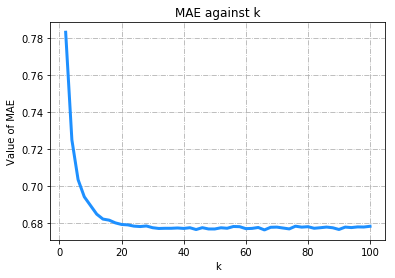

In [17]:
# plot 
x = range(2,102,2)
# MAE
plt.plot(x,mae,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of MAE')
plt.title('MAE against k (k-NN filter)')

Text(0.5,1,'RMSE against k')

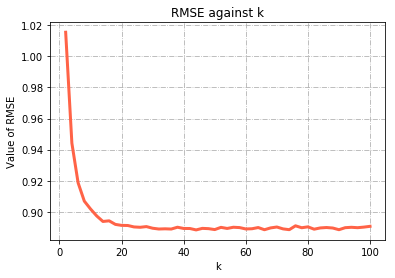

In [18]:
# RMSE
plt.plot(x,rmse,color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (k-NN filter)')

## Question 11:
Use the plot from question 10, to find a 'minimum k'. Note: The term 'minimum k' in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then 'minimum k' would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE.

The steady state values of MAE is: 0.683257956536476


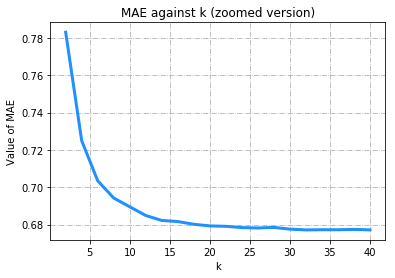

In [19]:
#  zoom MAE
plt.plot(x[:20],mae[:20],color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of MAE')
plt.title('MAE against k (zoomed version)')
print('The steady state values of MAE is:',np.mean(mae[:-10]))

The steady state of RMSE is: 0.8960893680190407


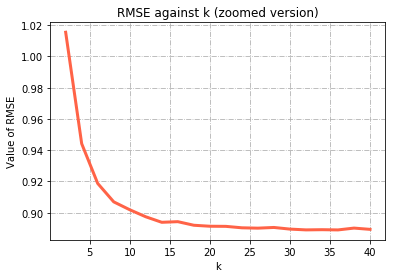

In [20]:
# zoom RMSE
plt.plot(x[:20],rmse[:20],color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (zoomed version)')
print('The steady state of RMSE is:',np.mean(rmse[:-10]))

#### The min stable state is when k = 20

## Question 12+13+14:
Design a k-NN collaborative filter to predict the ratings of the movies in the \[popular movie trimmed, unpopular movie trimmed, high variance movie trimmed\] test set and evaluate it's performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.

### Popular movie trimming

In [69]:
# Define a function for Popular movie trimming

#testset_sort = sorted(testset,key=lambda x:int(x[1]))
#count_sort = sorted(Counter([x[1] for x in testset_sort]).items(),
 #                   key=lambda item:int(item[1]))
def PMT(testset):    
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter = list(filter(lambda x:x[1] > 2,counter))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

# test PMT function
a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5)]
PMT(a)

[('0', '1', 4), ('0', '1', 3), ('2', '1', 2)]

In [253]:
# train the dataset using Popular movie trimming
from surprise.model_selection import KFold
from surprise import accuracy

# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
sim = {'name':'pearson','user_based':True}
rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options=sim,verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        knn.fit(trainset)
        testset_trim = PMT(testset)
        predictions = knn.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0215
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0171
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0133
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0321
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0256
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0195
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0146
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0132
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0153
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0084
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9212
Computing 

RMSE: 0.8644
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8507
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8610
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8517
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8592
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8585
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8819
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8571
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8670
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8501
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8576
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.86

Done computing similarity matrix.
RMSE: 0.8450
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8563
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8495
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8553
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8628
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8631
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8546
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8424
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8588
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8580
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8673
Computing the pearson similarity matrix...
Done compu

RMSE: 0.8626
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8597
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8505
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8678
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8613
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8466
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8682
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8637
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8719
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8524
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8447
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.85

Done computing similarity matrix.
RMSE: 0.8579
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8633
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8597
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8447
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8525
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8620
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8563
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8599
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8597
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8589
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8425
Computing the pearson similarity matrix...
Done compu

RMSE: 0.8716
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8542
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8554
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8521
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8487
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8600
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8711
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8677
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8536
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8495
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8576
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.85

The minimum average value of RMSE is: 0.8548322418127625


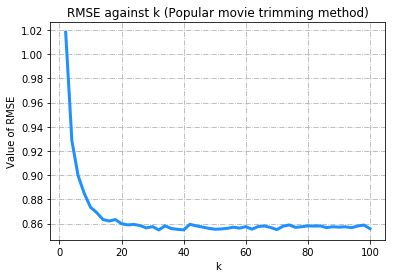

In [254]:
# show time (plot)
x = range(2,102,2)

plt.plot(x,rmse,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Popular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### Unpopular movie trimming

In [74]:
# define a function for Unpopular movie trimming
def UMT(testset):    
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter = list(filter(lambda x:x[1] <= 2,counter))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

# test PMT function
a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5)]
UMT(a)

[('2', '2', 2), ('2', '3', 5), ('6', '3', 5)]

In [255]:
# train the dataset using unpopular movie trimming
kf = KFold(n_splits=10)

# Construct a knn filter
sim = {'name':'pearson','user_based':True}
rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options=sim,verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        knn.fit(trainset)
        testset_trim = UMT(testset)
        predictions = knn.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0122
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0462
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0117
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0382
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9983
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0169
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0028
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0291
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0020
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0300
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9646
Computing 

Done computing similarity matrix.
RMSE: 0.9397
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9526
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9606
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9734
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9375
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9510
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9854
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9500
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9457
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9420
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9553
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9610
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9476
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9475
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9527
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9533
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9508
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9429
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9634
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9612
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9601
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9515
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.94

Done computing similarity matrix.
RMSE: 0.9272
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9349
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9671
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9613
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9974
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9613
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9623
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9420
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9543
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9382
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9339
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9610
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9540
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9552
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9507
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9897
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9779
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9473
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9599
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9635
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9444
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9433
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.95

Done computing similarity matrix.
RMSE: 0.9517
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9421
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9447
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9745
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9366
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9346
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9567
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9387
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9821
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9361
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9513
Computing the pearson similarity matrix...
Done compu

The minimum average value of RMSE is: 0.951260104160724


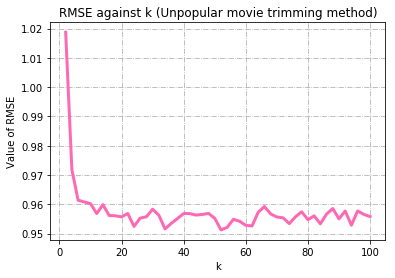

In [256]:
# show time (plot)
x = range(2,102,2)

plt.plot(x,rmse,color='hotpink',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Unpopular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### High variance movie trimming

In [89]:
# Define a function for high variance movie trimming method
def HVMT(testset):
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter1 = list(filter(lambda x:x[1] >= 5,counter))
    var_list = list(get_var(np.array(testset)[:,1:3]).items())
    count_filter2 = list(filter(lambda x:x[1] >= 2,var_list))
    count_filter = list(set([x[0] for x in count_filter1]).intersection(set([y[0] for y in count_filter2])))
    #count_filter = list([x[0] for x in count_filter1 if x[0] in [y[0] for y in count_filter2]])
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5),
    ('0','1',100),('0','1',20),('5','3',5),('6','3',5)]
HVMT(a)

[('0', '1', 4), ('0', '1', 3), ('2', '1', 2), ('0', '1', 100), ('0', '1', 20)]

In [257]:
# train the dataset using high variance movie trimming method
kf = KFold(n_splits=10)

# Construct a knn filter
sim = {'name':'pearson','user_based':True}
rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options=sim,verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        knn.fit(trainset)
        testset_trim = HVMT(testset)
        predictions = knn.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7616
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8347
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9190
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9948
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8058
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1078
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8829
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9950
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9430
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9351
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8157
Computing 

Done computing similarity matrix.
RMSE: 0.8338
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7746
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6636
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0346
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7504
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7261
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7673
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7608
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9522
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8647
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7529
Computing the pearson similarity matrix...
Done compu

RMSE: 0.7907
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7396
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7739
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8594
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6971
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7465
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6029
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8343
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8266
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8641
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7049
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.63

Done computing similarity matrix.
RMSE: 0.8131
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7459
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8542
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9195
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6776
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7838
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9435
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9050
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7603
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6767
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7789
Computing the pearson similarity matrix...
Done compu

RMSE: 0.6452
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8306
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8670
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9390
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8517
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9688
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5874
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8492
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6989
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7201
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7210
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.94

Done computing similarity matrix.
RMSE: 0.8613
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8231
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7789
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8273
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7220
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8769
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7006
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8671
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7799
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8969
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7665
Computing the pearson similarity matrix...
Done compu

The minimum average of RMSE is: 0.7683069443497439


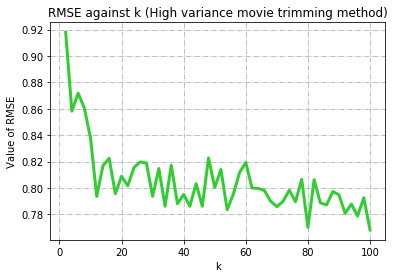

In [258]:
# show time (plot)
x = range(2,102,2)

plt.plot(x,rmse,color='limegreen',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (High variance movie trimming method)')
print('The minimum average of RMSE is:',min(rmse))

## Question 15:
Plot the ROC curves for the k-NN collaborative filter designed in question 10 for threshold values \[2.5, 3, 3.5, 4\]. For the ROC plotting use the k found inn question 11. For each of the plots, also report the area under the curve (AUC) value.

In [141]:
# define plot drawing
from sklearn import metrics
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, linewidth=3,color='deepskyblue',label= 'area under curve = %0.4f' % roc_auc)
    #color='coral'
    
    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)       

#### Here we assume the person likes the movie, of which the label is 1 when the rating is equal to the threshold.

#### In question 10 we find when k = 20, the system tends to be stable, so we use k = 20 here.

Computing the pearson similarity matrix...
Done computing similarity matrix.


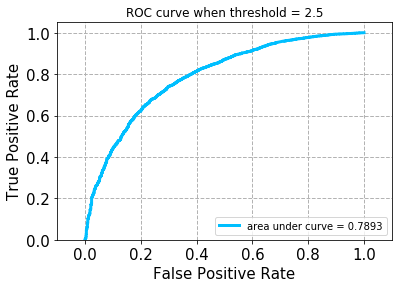

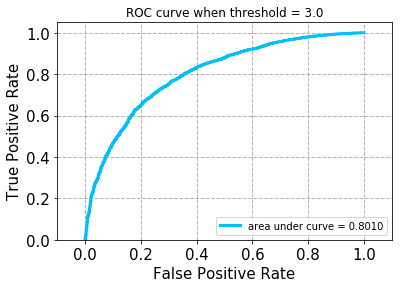

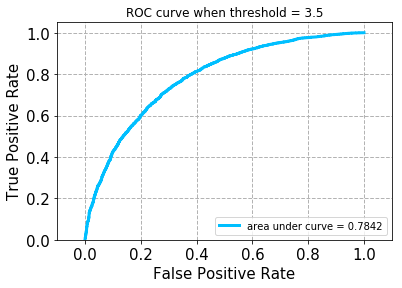

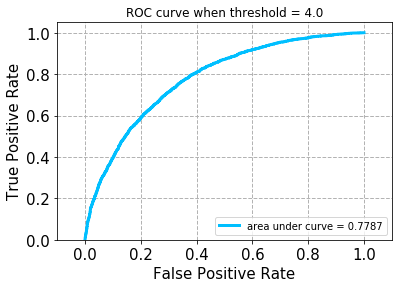

In [288]:
# Define a func to get ground_truth
def get_labels(predictions,threshold):
    #y_pred = list(map(lambda x:0 if x[3] < threshold else 1, predictions))
    #y_true = list(map(lambda x:0 if x[2] < threshold else 1, predictions))
    y_true, y_pred = [], []
    for u, i, r_real, r_pred, misc in pred:
        y_true.append(thresh <= r_real)
        y_pred.append(r_pred)
    return y_pred, y_true

# Train the binary dataset
threshold = [2.5,3,3.5,4]
sim = {'name':'pearson','user_based':True}
knn = KNNWithMeans(k=20, min_k=1, sim_options=sim, verbose=True)
trainset, testset = train_test_split(data, test_size=.1)
predictions = knn.fit(trainset).test(testset)
for thresh in threshold:
    y_pred, y_true = get_labels(predictions, thresh)
    fpr,tpr,_ = roc_curve(y_true=y_true, y_score=y_pred,pos_label=1)
    #plt.plot(fpr,tpr)
    plot_roc(fpr,tpr)
    plt.title('ROC curve when threshold = %2.1f' % thresh)

## Question 16:
Is the optimization problem given by equation 5 convex? Consider the optimization problem given by equation 5. For U fixed, formulate it as a least-squares problem.

## Question 17:
Design a NNMF-based collaborative filter to predict the ratings of the momvies in the MovieLens dataset and evaluate it's performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 inn step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the aberage RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter. 

In [144]:
from surprise import NMF

mae = []
rmse = []

for k in range(2,52,2):
    nmf = NMF(n_factors=k)
    result_dict = cross_validate(nmf, data, measures=['RMSE', 'MAE'], cv=10, 
                                 verbose=True)
    mae.append(np.mean(result_dict['test_mae']))
    rmse.append(np.mean(result_dict['test_rmse']))

Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.1438  1.1366  1.1433  1.1501  1.1452  1.1426  1.1473  1.1586  1.1504  1.1396  1.1457  0.0059  
MAE (testset)     0.9614  0.9551  0.9585  0.9679  0.9605  0.9634  0.9681  0.9773  0.9661  0.9588  0.9637  0.0061  
Fit time          8.70    8.53    7.76    8.20    8.24    8.60    7.54    8.87    8.42    8.43    8.33    0.39    
Test time         0.16    0.10    0.26    0.12    0.12    0.19    0.10    0.13    0.42    0.08    0.17    0.10    
Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0394  1.0326  1.0330  1.0482  1.0347  1.0364  1.0342  1.0345  1.0442  1.0441  1.0381  0.0053  
MAE (testset)     0.8489  0.8429  0.8474  0.8502  0.8464  0.8474  0.8447  0.8456  0.8

Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9376  0.9316  0.9294  0.9266  0.9215  0.9251  0.9245  0.9273  0.9340  0.9419  0.9300  0.0060  
MAE (testset)     0.7019  0.7043  0.7021  0.6981  0.6939  0.6959  0.6986  0.6992  0.7033  0.7079  0.7005  0.0040  
Fit time          9.62    9.05    9.07    9.18    9.35    9.21    9.12    10.03   9.31    9.94    9.39    0.34    
Test time         0.05    0.06    0.07    0.20    0.06    0.05    0.08    0.20    0.08    0.05    0.09    0.06    
Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9178  0.9232  0.9430  0.9317  0.9355  0.9364  0.9383  0.9493  0.9360  0.9208  0.9332  0.0095  
MAE (testset)     0.6948  0.6996  0.7124  0.7006  0.7051  0.7055  0.7034  0.7141  0.7

Text(0.5,1,'MAE against #k of latent factors (NNMF filter)')

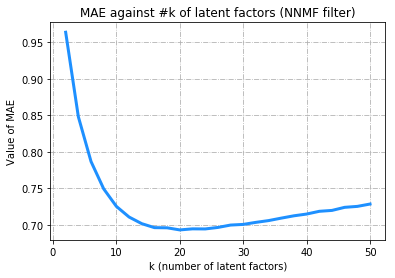

In [146]:
# plot 
x = range(2,52,2)
# MAE
plt.plot(x,mae,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of MAE')
plt.title('MAE against #k of latent factors (NNMF filter)')

Text(0.5,1,'RMSE against #k of latent factors (NNMF filter)')

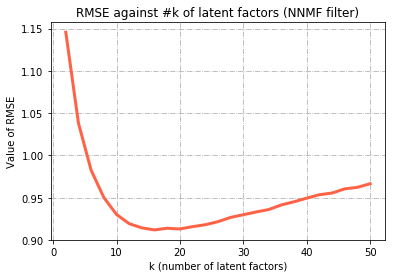

In [147]:
# RMSE
plt.plot(x,rmse,color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against #k of latent factors (NNMF filter)')

## Question 18:
Use the plot from question 17, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum avaerage RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?

In [155]:
# Find the optimal k and min value
K_rmse = range(2,52,2)[rmse.index(min(rmse))]
K_mae = range(2,52,2)[mae.index(min(mae))]
min_rmse = min(rmse)
min_mae = min(mae)
print('The optimal k for RMSE is:',K_rmse)
print('The minimum average RMSE value is:',min_rmse)
print('The optimal k for MAE is:',K_mae)
print('The minimum average MAE value is:',min_mae)

The optimal k for RMSE is: 16
The minimum average RMSE value is: 0.9119957025316605
The optimal k for MAE is: 20
The minimum average MAE value is: 0.6929618519042449


In [168]:
# Find out the number of genres
movies_genre = [x[2] for x in movies]
genres = [x.split('|') for x in movies_genre]
genres = set([y for x in genres for y in x])
print('The number of genres is:',len(genres))

The number of genres is: 20


## Question 19+20+21:
Design a NNMF collaborative filter to predict the ratings of the movies in \[ popular movie trimmed, unpopular movie trimmed, high variance movie trimmed \] test set and evaluate it's performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the acerage RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.

### Popular movie trimmed method

In [169]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    nmf = NMF(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        nmf.fit(trainset)
        testset_trim = PMT(testset)
        predictions = nmf.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 1.1387
RMSE: 1.1453
RMSE: 1.1448
RMSE: 1.1440
RMSE: 1.1322
RMSE: 1.1285
RMSE: 1.1337
RMSE: 1.1354
RMSE: 1.1345
RMSE: 1.1320
RMSE: 1.0280
RMSE: 1.0031
RMSE: 1.0104
RMSE: 1.0194
RMSE: 1.0173
RMSE: 1.0090
RMSE: 1.0196
RMSE: 1.0194
RMSE: 1.0113
RMSE: 1.0149
RMSE: 0.9455
RMSE: 0.9434
RMSE: 0.9459
RMSE: 0.9354
RMSE: 0.9567
RMSE: 0.9546
RMSE: 0.9527
RMSE: 0.9455
RMSE: 0.9430
RMSE: 0.9534
RMSE: 0.9117
RMSE: 0.9110
RMSE: 0.9155
RMSE: 0.9166
RMSE: 0.8953
RMSE: 0.9036
RMSE: 0.9106
RMSE: 0.9046
RMSE: 0.9121
RMSE: 0.9057
RMSE: 0.8894
RMSE: 0.8797
RMSE: 0.8828
RMSE: 0.8897
RMSE: 0.8870
RMSE: 0.9060
RMSE: 0.8990
RMSE: 0.8901
RMSE: 0.9034
RMSE: 0.8793
RMSE: 0.8857
RMSE: 0.8750
RMSE: 0.8963
RMSE: 0.8779
RMSE: 0.8642
RMSE: 0.8734
RMSE: 0.8818
RMSE: 0.8947
RMSE: 0.8911
RMSE: 0.8832
RMSE: 0.8829
RMSE: 0.8752
RMSE: 0.8679
RMSE: 0.8577
RMSE: 0.8863
RMSE: 0.8950
RMSE: 0.8603
RMSE: 0.8739
RMSE: 0.8614
RMSE: 0.8837
RMSE: 0.8652
RMSE: 0.8673
RMSE: 0.8810
RMSE: 0.8609
RMSE: 0.8888
RMSE: 0.8521
RMSE: 0.8724

The minimum average value of RMSE is: 0.8694672637780329


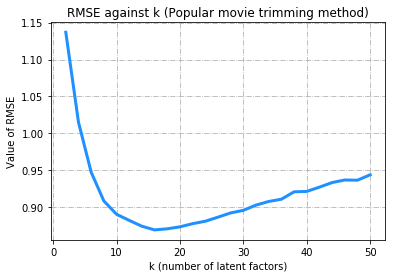

In [170]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Popular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### Unpopular movie trimming method

In [171]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    nmf = NMF(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        nmf.fit(trainset)
        testset_trim = UMT(testset)
        predictions = nmf.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 1.1431
RMSE: 1.1586
RMSE: 1.1292
RMSE: 1.1579
RMSE: 1.1357
RMSE: 1.1391
RMSE: 1.1686
RMSE: 1.1424
RMSE: 1.1992
RMSE: 1.1511
RMSE: 1.0845
RMSE: 1.0942
RMSE: 1.0738
RMSE: 1.1096
RMSE: 1.0942
RMSE: 1.0785
RMSE: 1.0933
RMSE: 1.0853
RMSE: 1.0915
RMSE: 1.0969
RMSE: 1.0365
RMSE: 1.0353
RMSE: 1.0398
RMSE: 1.0544
RMSE: 1.0400
RMSE: 1.0637
RMSE: 1.0307
RMSE: 1.0501
RMSE: 1.0636
RMSE: 1.0613
RMSE: 1.0066
RMSE: 1.0422
RMSE: 1.0188
RMSE: 1.0187
RMSE: 1.0271
RMSE: 1.0421
RMSE: 1.0233
RMSE: 1.0490
RMSE: 1.0361
RMSE: 1.0173
RMSE: 1.0239
RMSE: 1.0225
RMSE: 1.0253
RMSE: 0.9963
RMSE: 1.0022
RMSE: 1.0115
RMSE: 1.0059
RMSE: 1.0059
RMSE: 1.0205
RMSE: 1.0268
RMSE: 1.0127
RMSE: 1.0213
RMSE: 1.0190
RMSE: 0.9780
RMSE: 1.0040
RMSE: 1.0086
RMSE: 0.9833
RMSE: 1.0255
RMSE: 1.0030
RMSE: 1.0183
RMSE: 0.9942
RMSE: 0.9999
RMSE: 1.0226
RMSE: 0.9850
RMSE: 0.9645
RMSE: 0.9793
RMSE: 1.0076
RMSE: 0.9974
RMSE: 1.0057
RMSE: 0.9624
RMSE: 1.0033
RMSE: 1.0036
RMSE: 1.0024
RMSE: 1.0291
RMSE: 0.9803
RMSE: 0.9883
RMSE: 0.9833

The minimum average value of RMSE is: 0.9881696966401068


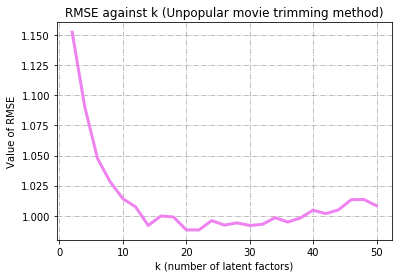

In [172]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='violet',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Unpopular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### High variance movie trimming method

In [173]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    nmf = NMF(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        nmf.fit(trainset)
        testset_trim = HVMT(testset)
        predictions = nmf.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 1.0456
RMSE: 1.0464
RMSE: 0.8751
RMSE: 1.2087
RMSE: 1.2510
RMSE: 1.0693
RMSE: 0.9610
RMSE: 1.0375
RMSE: 1.2363
RMSE: 1.1426
RMSE: 1.1207
RMSE: 0.9301
RMSE: 0.9057
RMSE: 0.7682
RMSE: 0.8821
RMSE: 0.9207
RMSE: 0.9663
RMSE: 0.9760
RMSE: 0.9184
RMSE: 0.8607
RMSE: 0.7881
RMSE: 0.9111
RMSE: 0.9760
RMSE: 0.9715
RMSE: 0.6942
RMSE: 0.9708
RMSE: 0.6899
RMSE: 1.0303
RMSE: 0.9030
RMSE: 0.8689
RMSE: 0.7850
RMSE: 0.7168
RMSE: 0.8659
RMSE: 0.8843
RMSE: 0.9749
RMSE: 0.7874
RMSE: 0.9001
RMSE: 0.8363
RMSE: 0.7348
RMSE: 0.7208
RMSE: 0.7080
RMSE: 0.8177
RMSE: 0.7220
RMSE: 0.8192
RMSE: 0.8349
RMSE: 0.7709
RMSE: 0.8616
RMSE: 0.7253
RMSE: 0.9305
RMSE: 0.8638
RMSE: 0.8829
RMSE: 0.6995
RMSE: 0.7646
RMSE: 0.7305
RMSE: 0.8274
RMSE: 0.9029
RMSE: 0.7431
RMSE: 0.6803
RMSE: 1.0283
RMSE: 0.8131
RMSE: 0.7155
RMSE: 0.7713
RMSE: 0.8040
RMSE: 0.8363
RMSE: 0.8685
RMSE: 0.9050
RMSE: 0.8724
RMSE: 0.8202
RMSE: 0.6725
RMSE: 0.6809
RMSE: 0.8514
RMSE: 0.6831
RMSE: 0.8828
RMSE: 0.6914
RMSE: 0.6046
RMSE: 0.8888
RMSE: 0.8303

The minimum average value of RMSE is: 0.7585844024224345


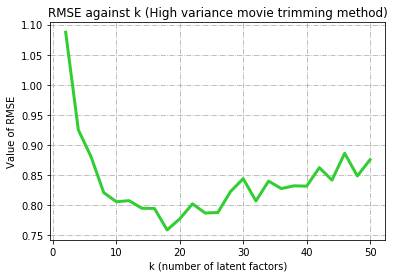

In [174]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='limegreen',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (High variance movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

## Question 22:
Plot the ROC curves for the NNMF-based collaborative filter designed in question 17 for threshold values \[2.5, 3, 3.5, 4\]. For the ROC plotting use the optimal number of latent factors found in question 18. For each of the plots, also report the area under the curve (AUG) value.

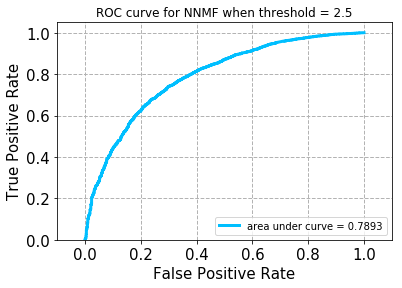

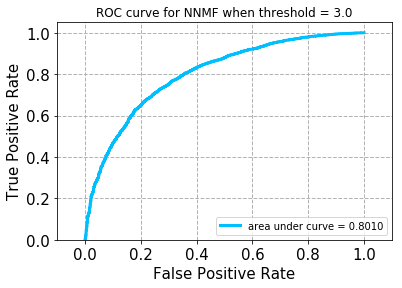

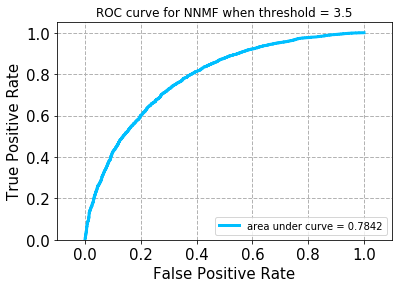

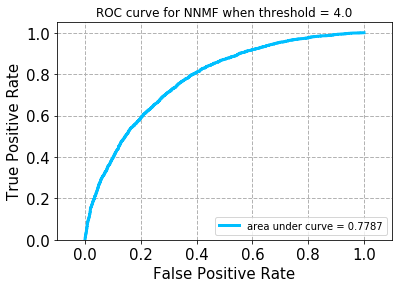

In [289]:
threshold = [2.5,3,3.5,4]
nmf = NMF(n_factors=20)
trainset, testset = train_test_split(data, test_size=.1)
predictions = nmf.fit(trainset).test(testset)
for thresh in threshold:
    y_pred, y_true = get_labels(predictions, thresh)
    fpr,tpr,_ = roc_curve(y_true, y_pred)
    plot_roc(fpr,tpr)
    plt.title('ROC curve for NNMF when threshold = %2.1f' % thresh)

## Question 23:
Perform Non-negative matrix factorization on the ratings matrix R to obtain the factor matrices U and V, where U represents the user-latent factors interaction and V represents te movie-latent factors interaction (use k = 20). For each column of V, sort the movies in descending order and report the genres of the top 10 movies. Do the top 10 movies velong to a particular or a small collection of genre? Is there a connection between the latent factors and the movie genres?

In [239]:
nmf = NMF(n_factors=20)
nmf.fit(data.build_full_trainset())
U = nmf.pu
V = nmf.qi
movie_idx = np.argsort(V,axis=0)
movie_id = list(set(ratings[:,1]))
movie_id.sort(key=list(ratings[:,1]).index)
total = movie_idx.shape[0]
genre_id = 0
for i in range(20):
    genre_id += 1
    print('*'*40)
    print('The top 10 movies of genre',genre_id,'are:')
    for top in range(total-1,total-11,-1):
        print(movie_id[movie_idx[top,i]])     

****************************************
The top 10 movies of genre 1 are:
5480
5048
58301
42730
3837
54648
1934
4789
1237
25771
****************************************
The top 10 movies of genre 2 are:
89118
102
158783
89904
4794
3521
166534
3597
5909
879
****************************************
The top 10 movies of genre 3 are:
73042
7116
2149
5034
4733
1916
8977
6022
190
3070
****************************************
The top 10 movies of genre 4 are:
120635
446
102903
3682
3404
70994
87529
95182
135532
40148
****************************************
The top 10 movies of genre 5 are:
7564
6639
159858
91470
173145
4821
86320
4846
3990
6140
****************************************
The top 10 movies of genre 6 are:
3223
4248
42018
72167
7155
40581
6686
8372
5874
2586
****************************************
The top 10 movies of genre 7 are:
79251
3040
8253
27251
2906
4396
4509
160565
27822
6732
****************************************
The top 10 movies of genre 8 are:
117192
3404
611
561

## Question 24:
Design a MF with bias collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in stop sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 fold. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.

In [241]:
from surprise import SVD

mae = []
rmse = []

for k in range(2,52,2):
    svd = SVD(n_factors=k)
    result_dict = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, 
                                 verbose=True)
    mae.append(np.mean(result_dict['test_mae']))
    rmse.append(np.mean(result_dict['test_rmse']))

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8760  0.8587  0.8608  0.8555  0.8743  0.8678  0.8662  0.8627  0.8807  0.8642  0.8667  0.0076  
MAE (testset)     0.6689  0.6599  0.6614  0.6573  0.6703  0.6646  0.6652  0.6632  0.6778  0.6660  0.6655  0.0055  
Fit time          1.42    1.55    1.46    1.53    1.53    1.46    1.62    1.55    1.59    1.47    1.52    0.06    
Test time         0.12    0.05    0.08    0.07    0.06    0.29    0.08    0.10    0.08    0.06    0.10    0.06    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8669  0.8609  0.8666  0.8677  0.8723  0.8681  0.8567  0.8728  0.8650  0.8658  0.8663  0.0045  
MAE (testset)     0.6663  0.6630  0.6668  0.6709  0.6686  0.6660  0.6584  0.6672  0.6

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8628  0.8772  0.8578  0.8765  0.8827  0.8611  0.8667  0.8590  0.8538  0.8684  0.8666  0.0090  
MAE (testset)     0.6658  0.6738  0.6608  0.6724  0.6759  0.6689  0.6666  0.6610  0.6527  0.6641  0.6662  0.0066  
Fit time          2.84    2.91    2.71    2.69    2.74    2.72    2.68    2.67    2.72    2.78    2.75    0.07    
Test time         0.09    0.08    0.06    0.26    0.06    0.07    0.06    0.05    0.05    0.07    0.09    0.06    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8698  0.8552  0.8697  0.8657  0.8616  0.8663  0.8636  0.8647  0.8679  0.8751  0.8660  0.0051  
MAE (testset)     0.6656  0.6563  0.6650  0.6666  0.6611  0.6673  0.6670  0.6627  0.6

Text(0.5,1,'MAE against #k of latent factors (MF with bias)')

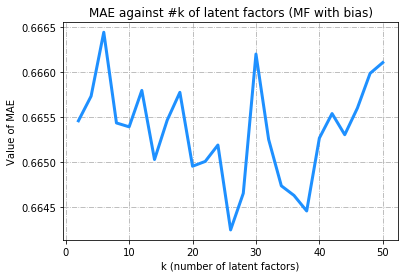

In [242]:
# plot 
x = range(2,52,2)
# MAE
plt.plot(x,mae,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of MAE')
plt.title('MAE against #k of latent factors (MF with bias)')

Text(0.5,1,'RMSE against #k of latent factors (MF with bias)')

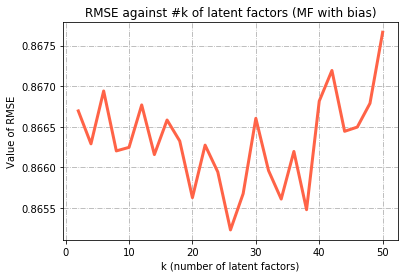

In [243]:
# plot 
x = range(2,52,2)
# RMSE
plt.plot(x,rmse,color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against #k of latent factors (MF with bias)')

## Question 25:
Use the plot from question 24, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE.

In [244]:
# Find the optimal k and min value
K_rmse = range(2,52,2)[rmse.index(min(rmse))]
K_mae = range(2,52,2)[mae.index(min(mae))]
min_rmse = min(rmse)
min_mae = min(mae)
print('The optimal k for RMSE is:',K_rmse)
print('The minimum average RMSE value is:',min_rmse)
print('The optimal k for MAE is:',K_mae)
print('The minimum average MAE value is:',min_mae)

The optimal k for RMSE is: 26
The minimum average RMSE value is: 0.8652265268986765
The optimal k for MAE is: 26
The minimum average MAE value is: 0.6642500615610645


## Question 26+27+28:
Design a MF with bias collaborative filter to predict the ratings of the movies in the \[ popular movie trimmed, unpopluar movie trimmed, high variance movie trimmed \] test set and evaluate it's performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.

### Popular movie trimming method

In [245]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    svd = SVD(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        svd.fit(trainset)
        testset_trim = PMT(testset)
        predictions = svd.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 0.8538
RMSE: 0.8414
RMSE: 0.8363
RMSE: 0.8533
RMSE: 0.8707
RMSE: 0.8500
RMSE: 0.8427
RMSE: 0.8510
RMSE: 0.8565
RMSE: 0.8502
RMSE: 0.8477
RMSE: 0.8411
RMSE: 0.8481
RMSE: 0.8496
RMSE: 0.8584
RMSE: 0.8560
RMSE: 0.8545
RMSE: 0.8361
RMSE: 0.8549
RMSE: 0.8428
RMSE: 0.8520
RMSE: 0.8488
RMSE: 0.8590
RMSE: 0.8426
RMSE: 0.8525
RMSE: 0.8533
RMSE: 0.8439
RMSE: 0.8578
RMSE: 0.8333
RMSE: 0.8506
RMSE: 0.8519
RMSE: 0.8330
RMSE: 0.8601
RMSE: 0.8443
RMSE: 0.8342
RMSE: 0.8522
RMSE: 0.8568
RMSE: 0.8466
RMSE: 0.8509
RMSE: 0.8567
RMSE: 0.8552
RMSE: 0.8484
RMSE: 0.8512
RMSE: 0.8409
RMSE: 0.8435
RMSE: 0.8576
RMSE: 0.8517
RMSE: 0.8570
RMSE: 0.8437
RMSE: 0.8428
RMSE: 0.8516
RMSE: 0.8542
RMSE: 0.8500
RMSE: 0.8323
RMSE: 0.8533
RMSE: 0.8630
RMSE: 0.8389
RMSE: 0.8586
RMSE: 0.8355
RMSE: 0.8601
RMSE: 0.8485
RMSE: 0.8465
RMSE: 0.8420
RMSE: 0.8466
RMSE: 0.8468
RMSE: 0.8601
RMSE: 0.8604
RMSE: 0.8463
RMSE: 0.8473
RMSE: 0.8544
RMSE: 0.8521
RMSE: 0.8484
RMSE: 0.8438
RMSE: 0.8482
RMSE: 0.8547
RMSE: 0.8586
RMSE: 0.8409

The minimum average value of RMSE is: 0.846117507969965


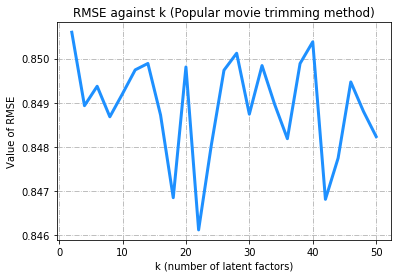

In [246]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Popular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### Unpopular movie trimming method

In [247]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    svd = SVD(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        svd.fit(trainset)
        testset_trim = UMT(testset)
        predictions = svd.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 0.8827
RMSE: 0.9081
RMSE: 0.8839
RMSE: 0.8967
RMSE: 0.9184
RMSE: 0.9191
RMSE: 0.8871
RMSE: 0.9029
RMSE: 0.9399
RMSE: 0.8959
RMSE: 0.9147
RMSE: 0.8934
RMSE: 0.9037
RMSE: 0.8922
RMSE: 0.9129
RMSE: 0.9066
RMSE: 0.8871
RMSE: 0.9178
RMSE: 0.8980
RMSE: 0.8892
RMSE: 0.9037
RMSE: 0.9047
RMSE: 0.8874
RMSE: 0.9000
RMSE: 0.9139
RMSE: 0.8882
RMSE: 0.9145
RMSE: 0.9006
RMSE: 0.8997
RMSE: 0.9111
RMSE: 0.9067
RMSE: 0.8900
RMSE: 0.8885
RMSE: 0.8958
RMSE: 0.9077
RMSE: 0.8852
RMSE: 0.9079
RMSE: 0.8909
RMSE: 0.9021
RMSE: 0.9121
RMSE: 0.9110
RMSE: 0.9114
RMSE: 0.8835
RMSE: 0.9027
RMSE: 0.9152
RMSE: 0.9239
RMSE: 0.8843
RMSE: 0.8952
RMSE: 0.8997
RMSE: 0.8936
RMSE: 0.9153
RMSE: 0.9142
RMSE: 0.8887
RMSE: 0.9204
RMSE: 0.8788
RMSE: 0.9119
RMSE: 0.8861
RMSE: 0.9260
RMSE: 0.8838
RMSE: 0.8708
RMSE: 0.9027
RMSE: 0.9093
RMSE: 0.9151
RMSE: 0.9072
RMSE: 0.8923
RMSE: 0.8987
RMSE: 0.8926
RMSE: 0.8748
RMSE: 0.8987
RMSE: 0.9187
RMSE: 0.8977
RMSE: 0.8963
RMSE: 0.9155
RMSE: 0.9090
RMSE: 0.8949
RMSE: 0.9175
RMSE: 0.9021

The minimum average value of RMSE is: 0.8986766558835846


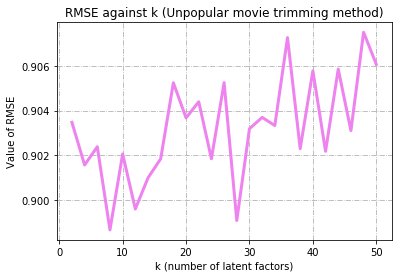

In [248]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='violet',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Unpopular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### High variance movie trimming method

In [249]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    svd = SVD(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        svd.fit(trainset)
        testset_trim = HVMT(testset)
        predictions = svd.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 0.7119
RMSE: 0.7390
RMSE: 0.6892
RMSE: 0.8024
RMSE: 0.8297
RMSE: 0.7257
RMSE: 0.6433
RMSE: 0.7925
RMSE: 0.9424
RMSE: 0.7237
RMSE: 0.6946
RMSE: 0.8485
RMSE: 0.8012
RMSE: 0.7530
RMSE: 0.8543
RMSE: 0.7862
RMSE: 0.8577
RMSE: 0.7683
RMSE: 0.8285
RMSE: 0.6822
RMSE: 0.6801
RMSE: 0.7399
RMSE: 0.8252
RMSE: 0.6752
RMSE: 0.9548
RMSE: 0.7319
RMSE: 0.7783
RMSE: 0.8026
RMSE: 0.7073
RMSE: 0.7395
RMSE: 0.8014
RMSE: 0.7262
RMSE: 0.8433
RMSE: 0.7687
RMSE: 0.6404
RMSE: 0.7625
RMSE: 0.8220
RMSE: 0.7516
RMSE: 0.8044
RMSE: 0.8879
RMSE: 0.7180
RMSE: 0.7403
RMSE: 0.6897
RMSE: 0.7440
RMSE: 0.8428
RMSE: 0.8898
RMSE: 0.7280
RMSE: 0.8102
RMSE: 0.7867
RMSE: 0.8905
RMSE: 0.7382
RMSE: 0.8356
RMSE: 0.6677
RMSE: 0.7291
RMSE: 0.7809
RMSE: 0.8501
RMSE: 0.7738
RMSE: 0.7460
RMSE: 0.7225
RMSE: 0.6286
RMSE: 0.8599
RMSE: 0.8880
RMSE: 0.7518
RMSE: 0.6201
RMSE: 0.8906
RMSE: 0.6959
RMSE: 0.7962
RMSE: 0.6461
RMSE: 0.7706
RMSE: 0.7159
RMSE: 0.8220
RMSE: 0.8558
RMSE: 0.7712
RMSE: 0.7008
RMSE: 0.7717
RMSE: 0.8873
RMSE: 0.7454

The minimum average value of RMSE is: 0.7472398048115325


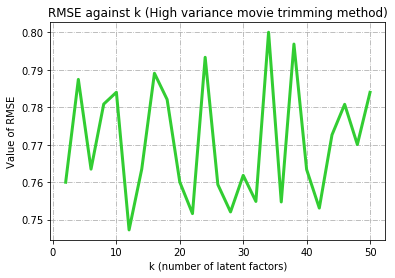

In [250]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='limegreen',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (High variance movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

## Question 29:
Plot the ROC curves for the MF with bias collaborative filter designed in question 24 for threshold values \[2.5, 3, 3.5, 4\]. For the ROC plotting use the optimal number of latent factors found in question 25. For each of the plots, also report the area under the curve (AUC) value.

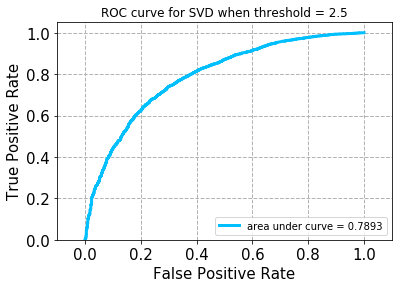

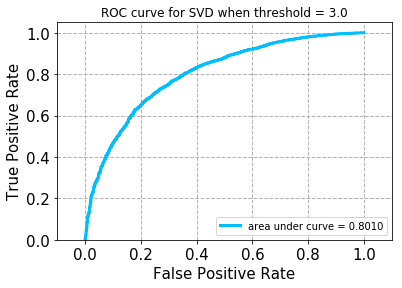

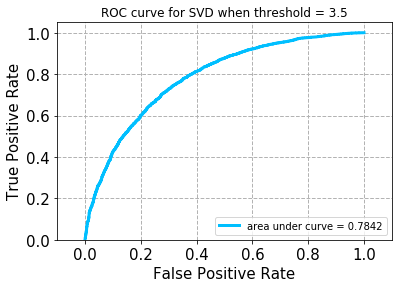

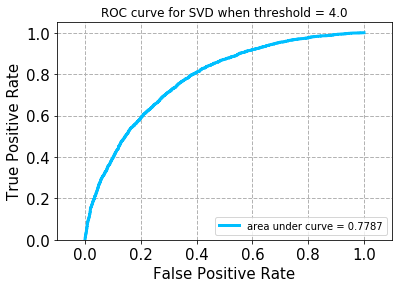

In [290]:
threshold = [2.5,3,3.5,4]
svd = SVD(n_factors=26)
trainset, testset = train_test_split(data, test_size=.1)
predictions = svd.fit(trainset).test(testset)
for thresh in threshold:
    y_pred, y_true = get_labels(predictions, thresh)
    fpr,tpr,_ = roc_curve(y_true, y_pred)
    plot_roc(fpr,tpr)
    plt.title('ROC curve for SVD when threshold = %2.1f' % thresh)

## Question 30:
Design a naive collaborative filter to predict the ratings the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross-validation. Compute the average RMSE by averaging thee RMSE across all 10 folds. Report the average RMSE.

In [259]:
from surprise import AlgoBase

class NaiveFilter(AlgoBase):
    def __init__(self):
        AlgoBase.__init__(self)
        
    def estimate(self, u, i):
        return np.mean([rating for (_, rating) in self.trainset.ur[u]])

In [260]:
naiveCF = NaiveFilter()
output = cross_validate(naiveCF, data, measures=['RMSE'], cv=10)
    
avg_rmse = np.mean(output['test_rmse'])
    
print("Avg RMSE: ", avg_rmse)

Avg RMSE:  0.9411524750635601


## Question 31+32+33:
Design a naive collaborative filter to predict the ratings of the movies in the \[popular movie trimmed, unpopular movie trimmed, high variance movie trimmed\] test set and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.

### Popular movie trimmed method

In [261]:
from surprise import accuracy
kf = KFold(n_splits=10)

rmse_i = list()

for trainset, testset in kf.split(data):
    naiveCF = NaiveFilter()
    naiveCF.fit(trainset)
    testset_trim = PMT(testset)

    predictions = naiveCF.test(testset_trim)

    rmse_i.append(accuracy.rmse(predictions, verbose=True))

avg_rmse = np.mean(rmse_i)
print("Avg RMSE:", avg_rmse)

RMSE: 0.9235
RMSE: 0.9235
RMSE: 0.9212
RMSE: 0.9259
RMSE: 0.9248
RMSE: 0.9361
RMSE: 0.9302
RMSE: 0.9547
RMSE: 0.9379
RMSE: 0.9296
Avg RMSE: 0.9307378013451428


### Unpopular movie trimming method

In [262]:
kf = KFold(n_splits=10)

rmse_i = list()

for trainset, testset in kf.split(data):
    naiveCF = NaiveFilter()
    naiveCF.fit(trainset)
    testset_trim = UMT(testset)

    predictions = naiveCF.test(testset_trim)

    rmse_i.append(accuracy.rmse(predictions, verbose=True))

avg_rmse = np.mean(rmse_i)
print("Avg RMSE:", avg_rmse)

RMSE: 0.9590
RMSE: 0.9738
RMSE: 0.9550
RMSE: 0.9483
RMSE: 0.9667
RMSE: 0.9538
RMSE: 0.9697
RMSE: 0.9832
RMSE: 0.9552
RMSE: 0.9506
Avg RMSE: 0.961533637186035


### High variance movie trimming method

In [263]:
kf = KFold(n_splits=10)

rmse_i = list()

for trainset, testset in kf.split(data):
    naiveCF = NaiveFilter()
    naiveCF.fit(trainset)
    testset_trim = HVMT(testset)

    predictions = naiveCF.test(testset_trim)

    rmse_i.append(accuracy.rmse(predictions, verbose=True))

avg_rmse = np.mean(rmse_i)
print("Avg RMSE:", avg_rmse)

RMSE: 0.9728
RMSE: 0.7173
RMSE: 0.7799
RMSE: 0.9225
RMSE: 0.9019
RMSE: 0.8515
RMSE: 0.9149
RMSE: 0.8393
RMSE: 0.8856
RMSE: 0.8617
Avg RMSE: 0.8647525305431738


## Question 34:
Plot the ROC curves (threshold = 3) for the k-NN, NNMF, and MF with bias based collaborative filters in the same figure. Use the figure to compare the performance of the filters in predicting the ratings of the movies.

Computing the pearson similarity matrix...
Done computing similarity matrix.


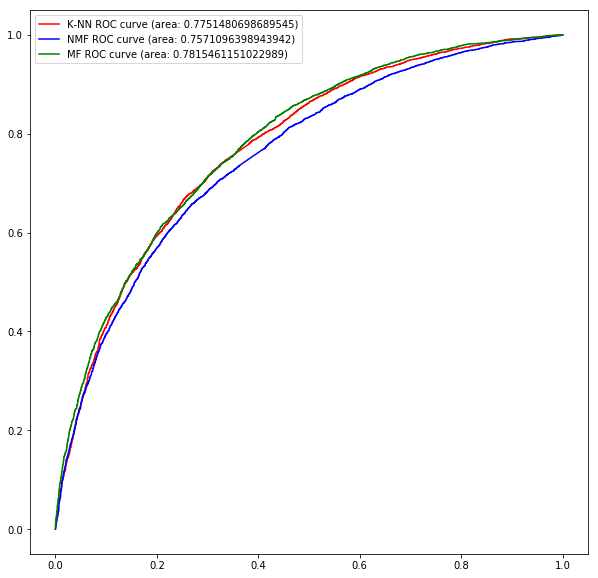

In [291]:
from surprise import NMF
from surprise import SVD
from sklearn import metrics
from surprise.model_selection import KFold

thres = 3
kf = KFold(n_splits=10)
for train, test in kf.split(data):
    trainset, testset = train, test
    break

knn = KNNWithMeans(k=20, min_k=1, sim_options=sim, verbose=True)
knn.fit(trainset)
pred = knn.test(testset)

plt.figure(figsize=(10, 10))

y_pred, y_true = get_labels(pred, thres)
x, y, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)
plt.plot(x, y, color='red')

knn_area = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)

nmf = NMF(n_factors=20)
nmf.fit(trainset)
pred = nmf.test(testset)

y_pred, y_true = get_labels(pred, thres)
x, y, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)
plt.plot(x, y, color='blue')

nmf_area = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)

svd = SVD(n_factors=26)
svd.fit(trainset)
pred = svd.test(testset)

y_pred, y_true = get_labels(pred, thres)
x, y, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)

mf_area = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)

plt.plot(x, y, color='green')

plt.legend(labels = ['K-NN ROC curve (area: ' + str(knn_area) + ')', 
                     'NMF ROC curve (area: ' + str(nmf_area) + ')', 
                     'MF ROC curve (area: ' + str(mf_area) + ')'])

## Question 35:

Precision and Recall are defined by the mathematical expressions given by equations 12 and 13 respectively. Please explain the meaning of precision and recall in your own words.

The answer is shown on the report.


## Question 36:
Plot average precision (Y-axis) against t (X-axis) for the rnking obtained using k-NN collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use the k found in question 11 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.

**How to compute precision@k and recall@k (Provided in the surprise official website** https://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision)

In [282]:
def precision_recall_at_k(predictions, k=10, threshold=3):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [283]:
from collections import defaultdict
kf = KFold(n_splits=10)

avg_precisions = list()
avg_recalls = list()

for i in range(1, 26):
    algo = KNNWithMeans(k=20, min_k=1, sim_options=sim, verbose=False)
    temp_precision = list()
    temp_recall = list()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=i)

        # Precision and recall can then be averaged over all users
        temp_precision.append(sum(prec for prec in precisions.values()) / len(precisions))
        temp_recall.append(sum(rec for rec in recalls.values()) / len(recalls))
    
    avg_precisions.append(sum(temp_precision) / len(temp_precision))
    avg_recalls.append(sum(temp_recall) / len(temp_recall))

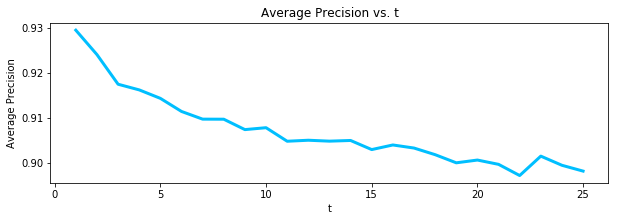

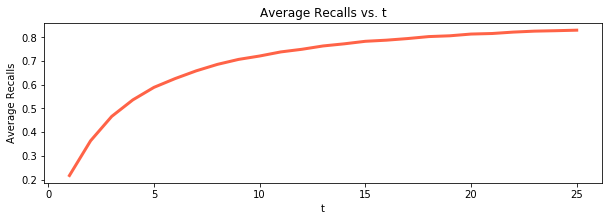

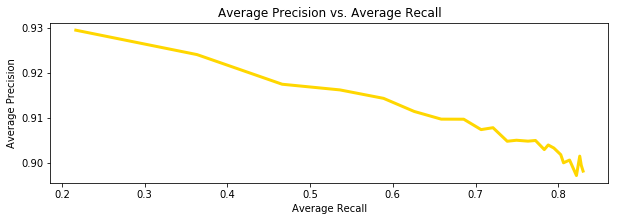

In [285]:
import itertools


plt.figure(figsize=(10, 10))

plt.subplot(3,1,1)
plt.title("Average Precision vs. t")
plt.ylabel("Average Precision")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_precisions,linewidth=3,color='deepskyblue')

plt.figure(figsize=(10, 10))

plt.subplot(3,1,2)
plt.title("Average Recalls vs. t")
plt.ylabel("Average Recalls")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_recalls,linewidth=3,color='tomato')

plot_list=zip(*sorted(zip(*(avg_recalls, avg_precisions))))

plt.figure(figsize=(10, 10))

plt.subplot(3,1,3)
plt.title("Average Precision vs. Average Recall")
plt.ylabel("Average Precision")
plt.xlabel("Average Recall")
plt.plot(*plot_list,linewidth=3,color='gold')

knn_precision = avg_precisions
knn_recall = avg_recalls


## Question 37:

Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using NNMF-based collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use optimal number of latent factors found in question 18 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.


In [286]:
from collections import defaultdict
kf = KFold(n_splits=10)

avg_precisions = list()
avg_recalls = list()

for i in range(1, 26):
    algo = NMF(n_factors=20)
    temp_precision = list()
    temp_recall = list()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=4)

        # Precision and recall can then be averaged over all users
        temp_precision.append(sum(prec for prec in precisions.values()) / len(precisions))
        temp_recall.append(sum(rec for rec in recalls.values()) / len(recalls))
    
    avg_precisions.append(sum(temp_precision) / len(temp_precision))
    avg_recalls.append(sum(temp_recall) / len(temp_recall))

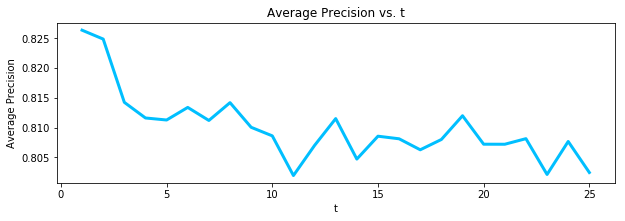

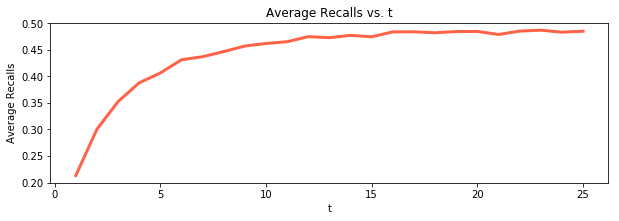

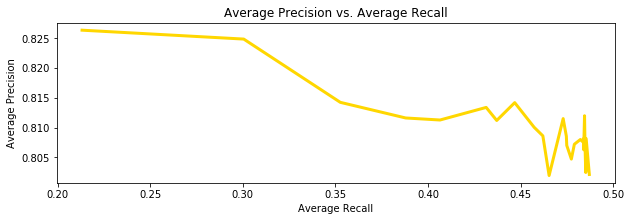

In [287]:
import itertools


plt.figure(figsize=(10, 10))

plt.subplot(3,1,1)
plt.title("Average Precision vs. t")
plt.ylabel("Average Precision")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_precisions,linewidth=3,color='deepskyblue')

plt.figure(figsize=(10, 10))

plt.subplot(3,1,2)
plt.title("Average Recalls vs. t")
plt.ylabel("Average Recalls")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_recalls,linewidth=3,color='tomato')

plot_list=zip(*sorted(zip(*(avg_recalls, avg_precisions))))

plt.figure(figsize=(10, 10))

plt.subplot(3,1,3)
plt.title("Average Precision vs. Average Recall")
plt.ylabel("Average Precision")
plt.xlabel("Average Recall")
plt.plot(*plot_list,linewidth=3,color='gold')

nmf_precision = avg_precisions
nmf_recall = avg_recalls

## Question 38:
Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using MF with bias-based collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use optimal number of latent factors found in question 25 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.

In [292]:
from collections import defaultdict
kf = KFold(n_splits=10)

avg_precisions = list()
avg_recalls = list()

for i in range(1, 26):
    algo = SVD(n_factors=26)
    temp_precision = list()
    temp_recall = list()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=4)

        # Precision and recall can then be averaged over all users
        temp_precision.append(sum(prec for prec in precisions.values()) / len(precisions))
        temp_recall.append(sum(rec for rec in recalls.values()) / len(recalls))
    
    avg_precisions.append(sum(temp_precision) / len(temp_precision))
    avg_recalls.append(sum(temp_recall) / len(temp_recall))

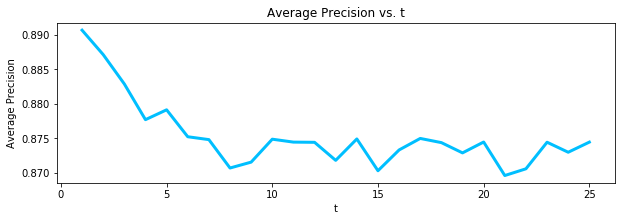

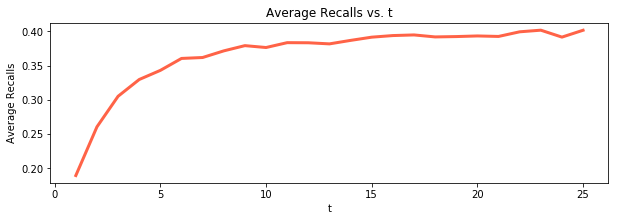

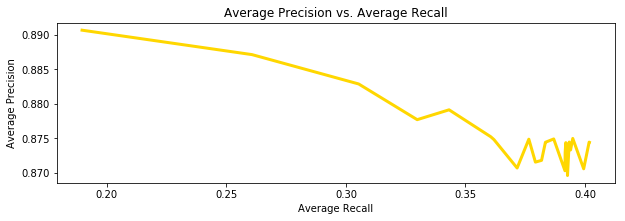

In [293]:
import itertools


plt.figure(figsize=(10, 10))

plt.subplot(3,1,1)
plt.title("Average Precision vs. t")
plt.ylabel("Average Precision")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_precisions,linewidth=3,color='deepskyblue')

plt.figure(figsize=(10, 10))

plt.subplot(3,1,2)
plt.title("Average Recalls vs. t")
plt.ylabel("Average Recalls")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_recalls,linewidth=3,color='tomato')

plot_list=zip(*sorted(zip(*(avg_recalls, avg_precisions))))

plt.figure(figsize=(10, 10))

plt.subplot(3,1,3)
plt.title("Average Precision vs. Average Recall")
plt.ylabel("Average Precision")
plt.xlabel("Average Recall")
plt.plot(*plot_list,linewidth=3,color='gold')

mf_precision = avg_precisions
mf_recall = avg_recalls

## Question 39:

Plot the precision-recall curve obtained in questions 36,37, and 38 in the same figure. Use this figure to compare the relevance of the recom- mendation list generated using k-NN, NNMF, and MF with bias predictions.


Text(0.5,1,'Precision-Recall')

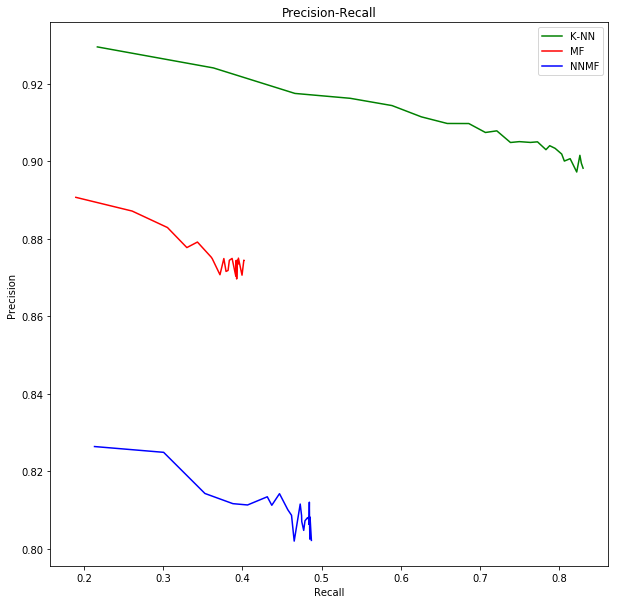

In [294]:
plt.figure(figsize=(10, 10))

plot_list=zip(*sorted(zip(*(knn_recall, knn_precision))))
plt.plot(*plot_list, color='green')

plot_list=zip(*sorted(zip(*(mf_recall, mf_precision))))
plt.plot(*plot_list, color='red')

plot_list=zip(*sorted(zip(*(nmf_recall, nmf_precision))))
plt.plot(*plot_list, color='blue')

plt.legend(labels = ['K-NN', 'MF', 'NNMF'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')